# Overview on the chiral centers for compounds found in patents
This notebook calculates the distribution of chiral centers for compounds found in patent documents.

# Import Modules

In [1]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

tqdm.pandas()

# Add path constants

In [2]:
MAPPING_DIR = "../data/mappings/"
FIGURE_DIR = "../data/figures"

# Load properties data dump

In [3]:
property_df = pd.read_csv(
    f"{MAPPING_DIR}/property_data.tsv", sep="\t", low_memory=False
)
property_df.head(2)

,SMILES,mw,logp,n_hba,n_hbd,tpsa,rot_bonds,fsp3,n_ring,n_heteroatoms,n_chiral
0,C1=C2C(c3ccc(-c4cccc5ccccc45)cc3)=NC(n3c4ccccc...,604.226312,9.5483,5,0,43.81,3,0.047619,10,5,2
1,C=CCOC(=O)[C@@H]1C[C@]2(C(C)Cc3ccc(OC)c(C=O)c3...,400.152203,2.6315,7,0,88.13,8,0.409091,3,7,2


# Statistical distribution of chiral compounds

In [4]:
chiral_count_ditc = {"0": 0, "1": 0, "2-5": 0, "6-10": 0, ">10": 0}

for smile in tqdm(property_df["SMILES"].unique()):
    chiral_count = smile.count("@")
    if chiral_count < 1:
        chiral_count_ditc["0"] += 1
    elif chiral_count == 1:
        chiral_count_ditc["1"] += 1
    elif chiral_count < 6:
        chiral_count_ditc["2-5"] += 1
    elif chiral_count < 11:
        chiral_count_ditc["6-10"] += 1
    else:
        chiral_count_ditc[">10"] += 1

100%|██████████| 10438113/10438113 [00:02<00:00, 3616053.19it/s]


In [5]:
data = pd.DataFrame(
    chiral_count_ditc.values(), index=chiral_count_ditc.keys(), columns=["counter"]
).reset_index()
data = data.rename(columns={"index": "chiral_center_counts"})
data

,chiral_center_counts,counter
0,0,7557811
1,1,568781
2,2-5,1735388
3,6-10,400452
4,>10,175681


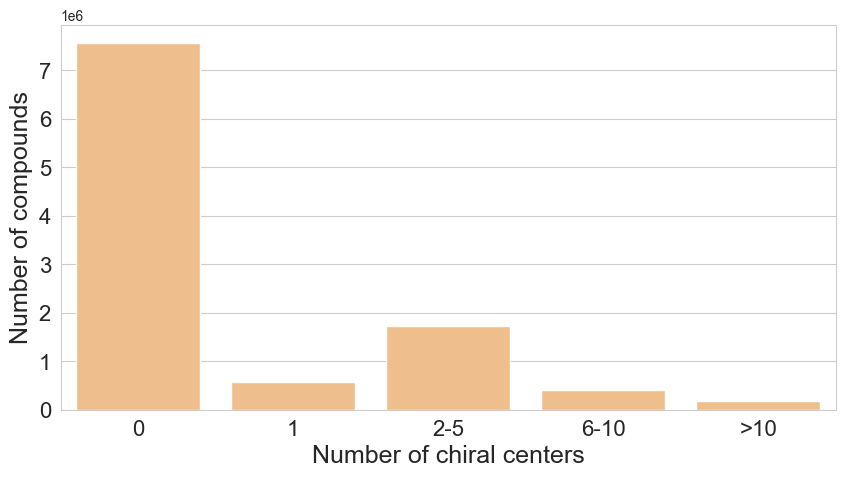

In [6]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(data=data, x="chiral_center_counts", y="counter", color="#ffbe7d")
plt.xlabel("Number of chiral centers", fontsize=18)
plt.ylabel("Number of compounds", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f"{FIGURE_DIR}/supplementary_figure_3.png", dpi=400, bbox_inches="tight")
plt.show()